In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
# Load the dataset
data = pd.read_csv('/content/task 04_dataset.csv')


In [ ]:
# Define column names
col_names = ['ID', 'Entity', 'Sentiment', 'Content']


In [ ]:
# Read the dataset with specified column names
df = pd.read_csv('/content/task 04_dataset.csv', names=col_names)


In [ ]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()


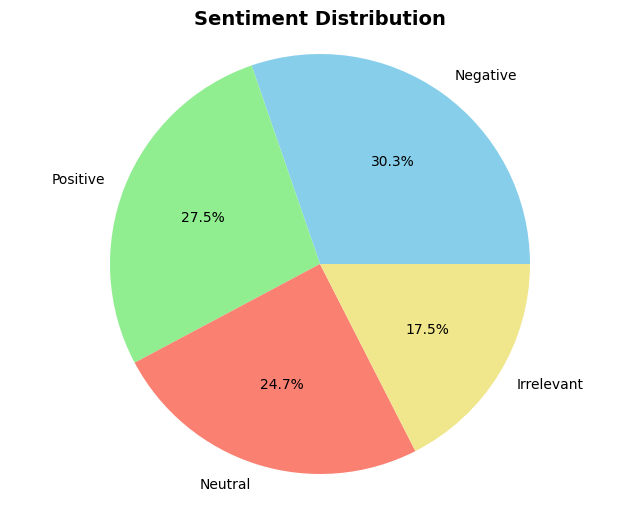

In [ ]:
# Plotting a pie chart for sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon', 'khaki'])
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()


In [ ]:
# Create a directed graph for entity-sentiment network
G = nx.DiGraph()

In [ ]:
# Add edges between entities and sentiments
for index, row in df.iterrows():
    entity = row['Entity']
    sentiment = row['Sentiment']
    G.add_edge(entity, sentiment)


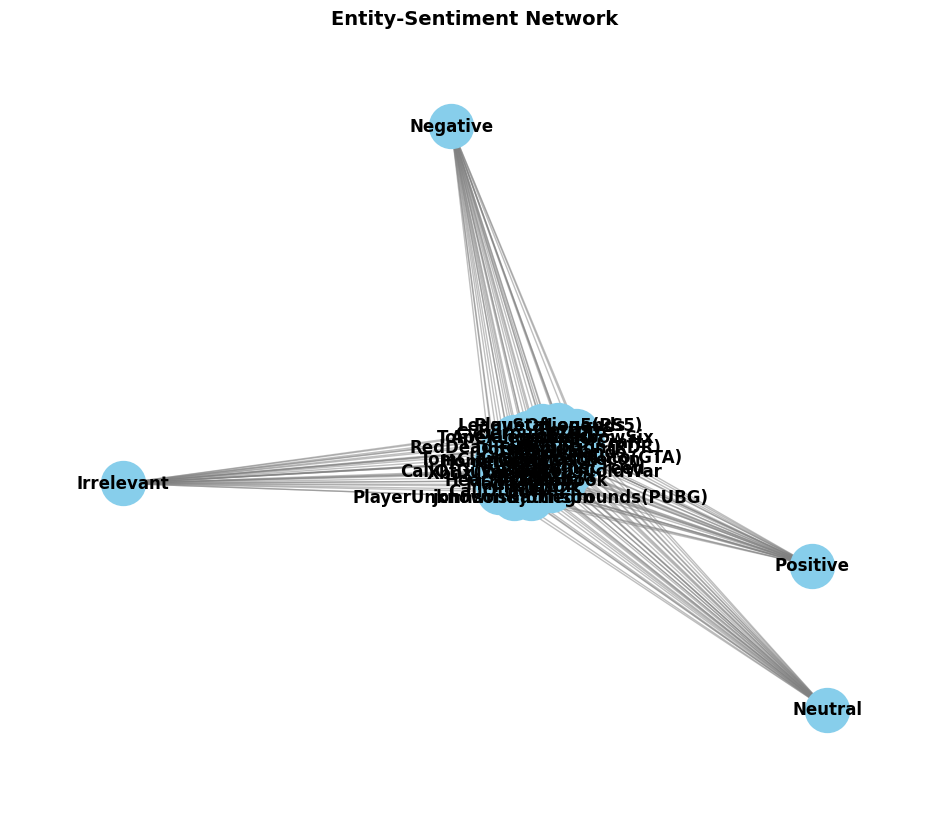

In [ ]:
# Plot the network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', font_weight='bold', font_color='black')
plt.title('Entity-Sentiment Network', fontsize=14, fontweight='bold')
plt.margins(0.1, 0.1)
plt.axis('off')
plt.show()


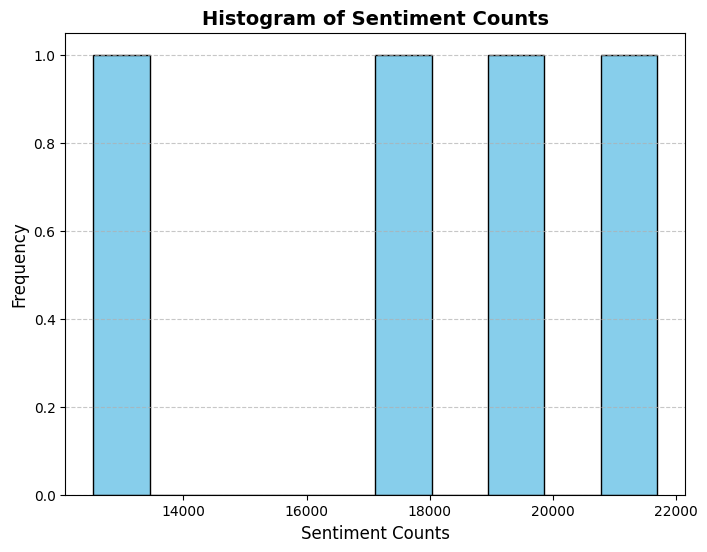

In [ ]:
# Plotting a histogram for sentiment counts
plt.figure(figsize=(8, 6))
plt.hist(sentiment_counts, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Counts', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


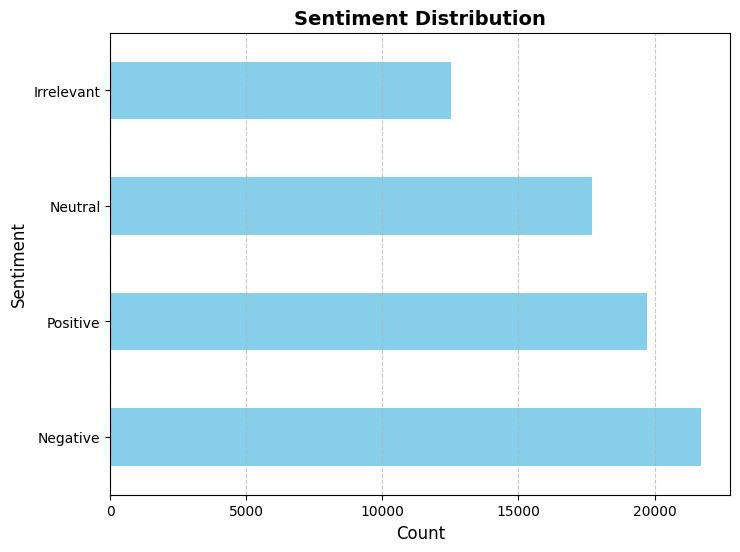

In [ ]:
# Plotting a horizontal bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='barh', color='skyblue')
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Sentiment', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

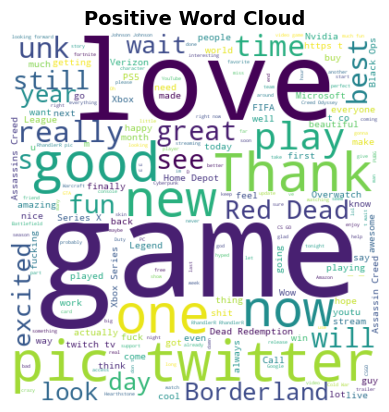

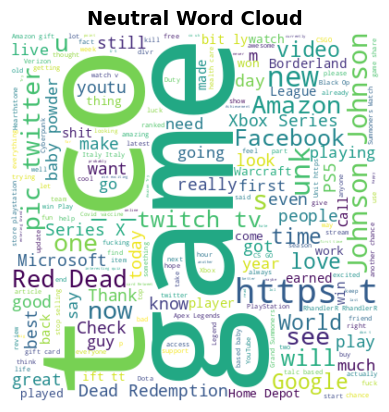

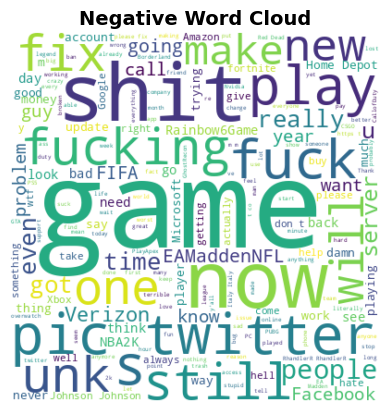

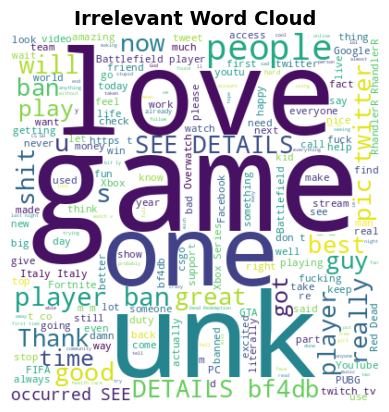

In [ ]:
# Generate word clouds for each sentiment
sentiments = df['Sentiment'].unique()
for sentiment in sentiments:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Content'])
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(sentiment + ' Word Cloud', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()

In [ ]:
# Perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
# Apply sentiment analysis to each post content
df['Sentiment'] = df['Content'].apply(get_sentiment)


In [ ]:
# Count the occurrences of each sentiment after sentiment analysis
sentiment_counts = df['Sentiment'].value_counts()


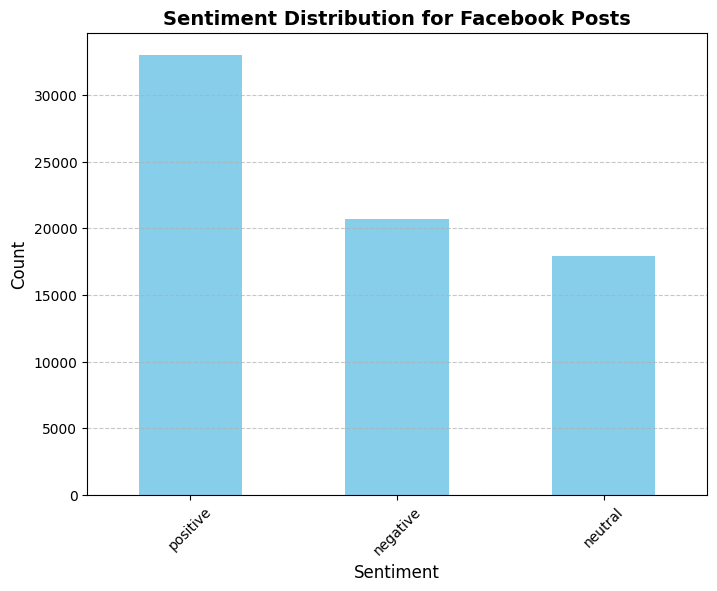

In [ ]:
# Plot the sentiment counts after sentiment analysis
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution for Facebook Posts', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()